# FeedForward Neural Network with Softmax

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np


In [2]:
# 1. Hyper Parameter
train_size = 784
num_classes = 10
hidden1_size = 500
learning_rate = 0.001

batch_size = 100
ephoc_size = 5


In [3]:
# 2. Data load
# MNIST Dataset 
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# 2-1. 샘플 데이터 확인
print(train_dataset)
# dataset.__getitem__(idx)
image,label = train_dataset.__getitem__(0)
print(image.size(),label)

# dataset[idx]
image,label = train_dataset[0]
print(image.size(),label)
print(image)

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None
torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 5
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 

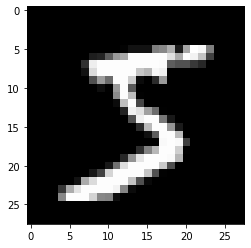

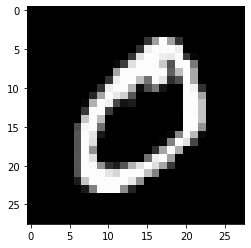

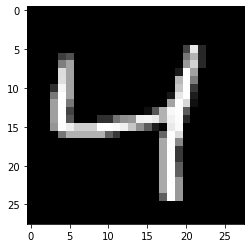

In [4]:
# 2-2. 샘플 데이터 출력
for i in range(3):
    img= train_dataset[i][0].numpy()
    plt.imshow(img[0],cmap='gray')
    plt.show()

In [5]:
# 3. Build the Model
class FeedForwardNN(nn.Module):
    def __init__(self, train_size, hidden1_size, num_classes):
        super(FeedForwardNN, self).__init__()
        self.linear1 = nn.Linear(train_size, hidden1_size) #784x20
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden1_size, num_classes) #20x10
        
    def forward(self, x):
        z1 = self.linear1(x)
        a1 = self.relu(z1)
        z2 = self.linear2(a1)
        
        return z2
        

In [6]:
# 4. Generate a model
model = FeedForwardNN(train_size, hidden1_size, num_classes)

In [7]:
# 5. Init loss function and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [17]:
# 6. Train
for ephoc in range(ephoc_size):
    print("ephoc: ",ephoc)
    for idx, (images, labels) in enumerate(train_loader):
        #convert dataset as the Pytorch style
        images = Variable(images.view(-1,28*28))
        labels = Variable(labels)
        
        #Forward, Backward, gradient
        optimizer.zero_grad()
        # outputs = model.forward(images)
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if idx%100 == 0:
            print("ephoc[",ephoc,"] \t", "loss:", loss.item())
            

ephoc:  0
ephoc[ 0 ] 	 loss: 0.050895806401968
ephoc[ 0 ] 	 loss: 0.004185801837593317
ephoc[ 0 ] 	 loss: 0.017350928857922554
ephoc[ 0 ] 	 loss: 0.058200325816869736
ephoc[ 0 ] 	 loss: 0.012960288673639297
ephoc[ 0 ] 	 loss: 0.022793374955654144
ephoc:  1
ephoc[ 1 ] 	 loss: 0.02613639272749424
ephoc[ 1 ] 	 loss: 0.024394208565354347
ephoc[ 1 ] 	 loss: 0.002612820826470852
ephoc[ 1 ] 	 loss: 0.008429832756519318
ephoc[ 1 ] 	 loss: 0.006175536662340164
ephoc[ 1 ] 	 loss: 0.008334443904459476
ephoc:  2
ephoc[ 2 ] 	 loss: 0.010154087096452713
ephoc[ 2 ] 	 loss: 0.014982893131673336
ephoc[ 2 ] 	 loss: 0.013547760434448719
ephoc[ 2 ] 	 loss: 0.013484754599630833
ephoc[ 2 ] 	 loss: 0.039927516132593155
ephoc[ 2 ] 	 loss: 0.007493119686841965
ephoc:  3
ephoc[ 3 ] 	 loss: 0.0027380632236599922
ephoc[ 3 ] 	 loss: 0.011099155060946941
ephoc[ 3 ] 	 loss: 0.006139671429991722
ephoc[ 3 ] 	 loss: 0.007353699766099453
ephoc[ 3 ] 	 loss: 0.008048461750149727
ephoc[ 3 ] 	 loss: 0.015130546875298023
eph

In [18]:
#Test the model
total = 0
correct = 0
for images, labels in test_loader:
    images = Variable(images.view(-1,28*28))

    outputs = model(images)   
    _, predicted = torch.max(outputs.data, 1)
    total += len(predicted)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %
